In [48]:
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

scikit-learn version: 0.19.1


In [49]:
#import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [50]:
# Load data
train = pd.read_csv("https://raw.githubusercontent.com/PyDataWorkshop/datasets/master/titanic/train.csv")  
test = pd.read_csv("https://raw.githubusercontent.com/PyDataWorkshop/datasets/master/titanic/test.csv")

In [51]:
print(train.columns.values)
#train.columns

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### Working with missing values

In [52]:
#Return columns with missing values from both data sets  only for numerical data
mv = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train', 'Test'])
mv[mv.sum(axis=1) > 0]

,Train,Test
Age,177,86.0
Cabin,687,327.0
Embarked,2,0.0
Fare,0,1.0


In [53]:
#train missing data percentage
t = train.isnull().sum().sort_values(ascending=False)
percentage = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
mvp = pd.concat([t, percentage], axis=1, keys=['Train Missing Values', 'Percentage'])
mvp.head()

,Train Missing Values,Percentage
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000


### very simple imputation technique

In [54]:
#imputing age
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(train["Age"].median())

In [55]:
#train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode())
train.Embarked.fillna("S", inplace=True)   #most common

In [56]:
test["Fare"] = test["Fare"].fillna(train["Fare"].median())

In [57]:
# remap categorical wih numerical
train['Sex'] = train['Sex'].map({'male':0,'female':1})
train['Embarked'] = train['Embarked'].map({'S':0,'C':1,'Q':2})


In [58]:
#test
test['Sex'] = test['Sex'].map({'male':0,'female':1})
test['Embarked'] = test['Embarked'].map({'S':0,'C':1,'Q':2})


### Feature Engineering

In [59]:
# Create a family size feature including the passenger themselves
train["FamilySize"] = train["SibSp"] + train["Parch"]+1
print(train["FamilySize"].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


In [61]:
# Create a family size feature including the passenger themselves
test["FamilySize"] = test["SibSp"] + test["Parch"]+1
print(test["FamilySize"].value_counts())

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: FamilySize, dtype: int64


In [62]:
#Create isAlone feature based off family size
train['isAlone']=0
train.loc[train['FamilySize']==1, 'isAlone'] = 1

In [63]:
#Create isAlone feature based off family size
test['isAlone']=0
test.loc[test['FamilySize']==1, 'isAlone'] = 1

In [64]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,isAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1


In [65]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,isAlone
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,1,1


In [66]:
#train = train.drop(['isAlone','isAlone_'], axis=1)
#test = test.drop(['isAlone','Cabin_Letter'], axis=1)

In [67]:
#cabin
#train.Cabin
#train['Title'] = train['Name'].map(lambda x:x.split(",")[1].split(".")[0].strip())

In [68]:
#create title feature
#train['Title'] = train['Name'].apply(lambda x: x.split(",")[1].split(" ")[1])

# extract the title from each name
train['Title'] = train['Name'].map(lambda x:x.split(",")[1].split(".")[0].strip())
    
# a map of more aggregated titles
Title_Dictionary = {
                        "Capt":       "Manager",
                        "Col":        "Manager",
                        "Major":      "Manager",
                        "Jonkheer":   "Noble",
                        "Don":        "Noble",
                        "Sir" :       "Noble",
                        "Dr":         "Manager",
                        "Rev":        "Manager",
                        "the Countess":"Noble",
                        "Dona":       "Noble",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Noble"

                        }
    
# map each title
train['Title'] = train.Title.map(Title_Dictionary)



train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,isAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1,Mr


In [69]:
#create title feature  test

test['Title'] = test['Name'].map(lambda x:x.split(",")[1].split(".")[0].strip())
    
# a map of more aggregated titles
Title_Dictionary = {
                        "Capt":       "Manager",
                        "Col":        "Manager",
                        "Major":      "Manager",
                        "Jonkheer":   "Noble",
                        "Don":        "Noble",
                        "Sir" :       "Noble",
                        "Dr":         "Manager",
                        "Rev":        "Manager",
                        "the Countess":"Noble",
                        "Dona":       "Noble",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Noble"

                        }
    
# map each title
test['Title'] = test.Title.map(Title_Dictionary)



test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,isAlone,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,1,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,2,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,1,1,Mr
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,1,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,3,0,Mrs


In [70]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,isAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0,Mrs


In [71]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)



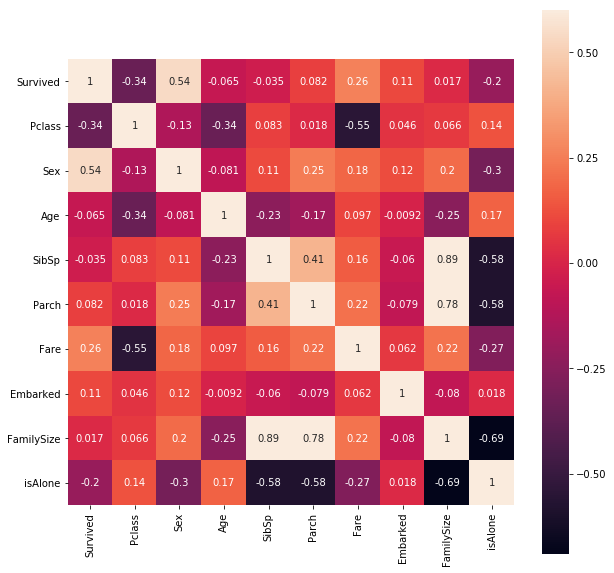

In [72]:
plt.figure(figsize=(10,10))
foo = sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

In [73]:
# we need to drop highly correlated features   FamilySize ?

In [74]:
train = train.drop(['SibSp','Parch'], axis=1)
test = test.drop(['SibSp','Parch'], axis=1)

In [75]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [76]:
#drop Name
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

# Convert Categorical features into Numerical ones

In [77]:
##Dummy variables
train = pd.get_dummies(train, columns = ['Title'])
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone,Title_Manager,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble
0,1,0,3,0,22.0,7.2500,0,2,0,0,0,0,1,0,0
1,2,1,1,1,38.0,71.2833,1,2,0,0,0,0,0,1,0
2,3,1,3,1,26.0,7.9250,0,1,1,0,0,1,0,0,0
3,4,1,1,1,35.0,53.1000,0,2,0,0,0,0,0,1,0
4,5,0,3,0,35.0,8.0500,0,1,1,0,0,0,1,0,0


In [78]:
##Dummy variables
test = pd.get_dummies(test, columns = ['Title'])
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone,Title_Manager,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble
0,892,3,0,34.5,7.8292,2,1,1,0,0,0,1,0,0
1,893,3,1,47.0,7.0000,0,2,0,0,0,0,0,1,0
2,894,2,0,62.0,9.6875,2,1,1,0,0,0,1,0,0
3,895,3,0,27.0,8.6625,0,1,1,0,0,0,1,0,0
4,896,3,1,22.0,12.2875,0,3,0,0,0,0,0,1,0


In [79]:
#check missing values
pd.isnull(train).any()

PassengerId      False
Survived         False
Pclass           False
Sex              False
Age              False
Fare             False
Embarked         False
FamilySize       False
isAlone          False
Title_Manager    False
Title_Master     False
Title_Miss       False
Title_Mr         False
Title_Mrs        False
Title_Noble      False
dtype: bool

In [80]:
pd.isnull(test).any()

PassengerId      False
Pclass           False
Sex              False
Age              False
Fare             False
Embarked         False
FamilySize       False
isAlone          False
Title_Manager    False
Title_Master     False
Title_Miss       False
Title_Mr         False
Title_Mrs        False
Title_Noble      False
dtype: bool

1. Data cleaned and prepared for further modelling. 
2. More feature engineering is required.


In [86]:
import os
os.getcwd()

'/home/nbuser/library'

In [87]:
# Create the csv file
train.to_csv('train_cleaned.csv', index = False)

In [82]:
test.to_csv('test_cleaned.csv', index = False)

In [83]:
# Load data     check
train_cleaned = pd.read_csv('train_cleaned.csv')  
train_cleaned.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone,Title_Manager,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble
0,1,0,3,0,22.0,7.2500,0,2,0,0,0,0,1,0,0
1,2,1,1,1,38.0,71.2833,1,2,0,0,0,0,0,1,0
2,3,1,3,1,26.0,7.9250,0,1,1,0,0,1,0,0,0
